In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## remove this cell before submitting

os.listdir()

['.ipynb_checkpoints',
 'SMS_Eligible_Did_Not_Receive_SMS',
 'SMS_Eligible_Received_SMS',
 'SMS_Eligible_Total_All_Rows_Analysis.ipynb',
 'sms_reminder_eligible_clean.csv']

In [3]:
# this function will greatly simplify getting percentages based on condition
# this can be used as a template if you want to change the equality operator to inequality (>,<, etc..)
def column_percentage_calculator(df, column_name, condition):
    total_rows = df.shape[0]
    num_matched_rows = len(df.loc[(df[column_name] == condition)])
    percentage_matches_condition = (num_matched_rows / total_rows) * 100
    return percentage_matches_condition

In [4]:
sms_eligible_appointments_df = pd.read_csv('sms_reminder_eligible_clean.csv')
sms_eligible_appointments_df.sample(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
22985,F,2016-04-05 09:07:08+00:00,2016-05-06 00:00:00+00:00,52,1,1,0,0,0,1,0,30,4
17739,M,2016-05-10 10:04:43+00:00,2016-05-16 00:00:00+00:00,10,0,0,0,0,0,0,0,5,0
8900,F,2016-04-07 16:03:49+00:00,2016-05-02 00:00:00+00:00,41,0,0,0,0,0,1,0,24,0
38013,F,2016-05-09 12:21:21+00:00,2016-05-13 00:00:00+00:00,81,0,1,0,0,0,0,1,3,4
43085,M,2016-04-20 10:32:15+00:00,2016-05-18 00:00:00+00:00,55,0,0,0,0,0,0,0,27,2
7465,F,2016-05-05 10:37:55+00:00,2016-05-10 00:00:00+00:00,93,0,0,0,0,0,1,0,4,1
5556,M,2016-04-07 07:41:24+00:00,2016-05-10 00:00:00+00:00,1,0,0,0,0,0,1,1,32,1
7974,M,2016-05-10 16:16:49+00:00,2016-05-17 00:00:00+00:00,52,0,0,0,0,0,0,0,6,1
43774,M,2016-05-05 13:58:19+00:00,2016-05-11 00:00:00+00:00,46,0,0,0,0,0,1,0,5,2
40859,F,2016-04-28 17:10:29+00:00,2016-05-02 00:00:00+00:00,19,1,0,0,0,0,1,1,3,0


In [5]:
sms_eligible_appointments_df.info()

# save total number of rows on import to a variable to be used in calculating percentages, etc...
total_num_sms_eligible_rows = sms_eligible_appointments_df.shape[0]

#total_num_sms_eligible_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59754 entries, 0 to 59753
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          59754 non-null  object
 1   ScheduledDay    59754 non-null  object
 2   AppointmentDay  59754 non-null  object
 3   Age             59754 non-null  int64 
 4   Scholarship     59754 non-null  int64 
 5   Hipertension    59754 non-null  int64 
 6   Diabetes        59754 non-null  int64 
 7   Alcoholism      59754 non-null  int64 
 8   Handicap        59754 non-null  int64 
 9   SMS_received    59754 non-null  int64 
 10  No-show         59754 non-null  int64 
 11  Days_Between    59754 non-null  int64 
 12  Day_Num         59754 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 5.9+ MB


__Now that the calculated columns for which ScheduledDay and AppointmentDay were needed to create, _Days_Between_ and _Day_Num_, the ScheduledDay and AppointmentDay columns can be dropped.__

In [6]:
# ScheduledDay and AppointmentDay are no longer needed so they can be dropped
drop_cols_list = ['ScheduledDay', 'AppointmentDay']

sms_eligible_appointments_df.drop(columns=drop_cols_list, axis = 1, inplace = True)
sms_eligible_appointments_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
0,M,29,0,0,0,0,0,1,1,2,4
1,F,15,0,0,0,0,0,1,0,2,4
2,F,30,1,0,0,0,0,1,0,2,4
3,M,13,0,0,0,0,0,1,1,3,4
4,M,46,0,1,0,0,0,1,0,2,4


In [7]:
sms_eligible_appointments_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000
mean,37.502611,0.096044,0.195401,0.067510,0.024885,0.014761,0.591207,0.296733,17.139873,1.709492
std,22.782551,0.294654,0.396513,0.250905,0.155777,0.120594,0.491615,0.456822,15.571214,1.378292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,2.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,5.000000


We will add a categorical column that will represent the 4 age buckets/brackets we will use in our analysis:
- Ages 0 - 18 ---> Youth
- Ages 19 - 36 ---> Young Adult
- Ages 37 - 55 ---> Adult
- Ages 56 + ---> Older Adults & Seniors

The cut off points for the brackets were determined by the general descriptive statistics in the cell above, specifically the 25%, 50%, and 75% thresholds. Conveniently these brackets closely align to popular culture definitions of 'Youth', 'Young Adult', 'Adult', and 'Older Adult/Senior'.

In [8]:
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Age < 19), 'Age Group'] ='Youth'
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Age > 18) & (sms_eligible_appointments_df.Age <= 36), 'Age Group'] ='Young Adult'
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Age > 36) & (sms_eligible_appointments_df.Age <= 55), 'Age Group'] ='Adult'
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Age > 55), 'Age Group'] = 'Older Adult and Seniors'
sms_eligible_appointments_df.sample(10)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group
23541,F,31,0,0,0,0,0,1,0,10,4,Young Adult
20225,F,48,0,0,0,0,0,0,0,22,2,Adult
24160,F,15,1,0,0,0,0,0,0,20,0,Youth
1665,F,40,0,0,0,0,0,1,1,12,0,Adult
39846,F,43,0,0,0,0,0,0,0,6,2,Adult
50984,F,15,0,0,0,0,0,1,0,8,3,Youth
14752,F,45,0,0,0,0,0,0,0,4,0,Adult
32668,F,35,0,0,0,0,0,1,0,3,1,Young Adult
45250,F,26,0,0,0,0,0,0,1,22,3,Young Adult
35705,F,14,0,0,0,0,0,1,0,3,0,Youth


__A new categorical column will be added to group the 'Days_Between' column into logical bins for analysis. The maximum threshold was set at 90 and the minimum value that makes a row eligible to receive an SMS reminder is 2, 3 interval groups will be created '2 - 30', '31 - 60', and '61 - 90'.__

In [9]:
## Add Days-Between Bucket column to see which time interval is present most in no-show appointments
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Days_Between <= 30), 'Interval Group'] = '2 - 30'
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Days_Between > 30) & (sms_eligible_appointments_df.Days_Between <= 60), 'Interval Group'] = '31 - 60'
sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.Days_Between > 60), 'Interval Group'] = '61 - 90'

In [10]:
# visually inspect a sample to make sure column was added and persists as well as values appear correct
sms_eligible_appointments_df.sample(10)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
46560,M,0,0,0,0,0,0,1,1,5,0,Youth,2 - 30
32888,F,52,0,0,0,0,0,1,0,11,0,Adult,2 - 30
42761,F,33,0,0,0,0,0,1,0,5,1,Young Adult,2 - 30
46300,F,66,0,1,0,0,0,1,0,27,2,Older Adult and Seniors,2 - 30
7309,M,49,0,0,1,0,0,1,1,14,2,Adult,2 - 30
27811,F,13,0,0,0,0,0,1,0,27,1,Youth,2 - 30
10726,F,56,0,0,0,0,0,0,0,4,2,Older Adult and Seniors,2 - 30
42766,F,40,0,0,0,0,0,0,0,26,0,Adult,2 - 30
36957,F,27,0,0,0,0,0,0,1,2,0,Young Adult,2 - 30
6743,F,43,0,0,0,0,0,1,0,13,0,Adult,2 - 30


<AxesSubplot:ylabel='Frequency'>

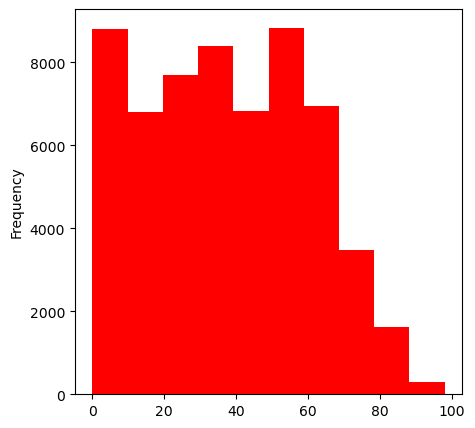

In [11]:
sms_eligible_appointments_df.Age.plot(kind='hist', figsize=(5,5), color = 'red')

In [12]:
age_median = sms_eligible_appointments_df.Age.median()
print('{} is the median age.'.format(age_median))

37.0 is the median age.


<AxesSubplot:ylabel='Frequency'>

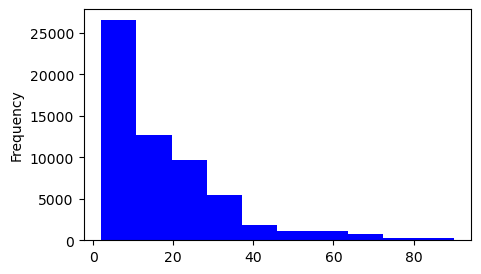

In [13]:
sms_eligible_appointments_df.Days_Between.plot(kind='hist', figsize=(5,3), color='blue')

In [14]:
# calculate percent each gender makes up of SMS-eligible row
sms_eligible_male_percent = column_percentage_calculator(sms_eligible_appointments_df, 'Gender', 'M')
sms_eligible_female_percent = column_percentage_calculator(sms_eligible_appointments_df, 'Gender', 'F')
print('{}% of SMS-eligible appointments were for male patients.'.format(round(sms_eligible_male_percent, 2)))
print('{}% of SMS-eligible appointments were for female patients.'.format(round(sms_eligible_female_percent, 2)))

33.13% of SMS-eligible appointments were for male patients.
66.87% of SMS-eligible appointments were for female patients.


Text(0.5, 1.0, 'No-Show Gender Percentage')

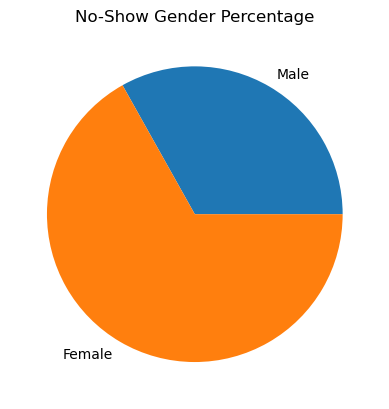

In [15]:
# visualize gender binary distribution
gender_percents = [sms_eligible_male_percent, sms_eligible_female_percent]
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(gender_percents, labels = labels)
ax.set_title('No-Show Gender Percentage')

In [16]:
two_to_thirty_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Interval Group', '2 - 30')
num_thirtyone_to_sixty_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Interval Group', '31 - 60')
num_sixtyone_to_ninety_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Interval Group', '61 - 90')

print('Percentage of SMS-Eligible appointments scheduled between 2 and 30 days out ---> {}%'.format(round(two_to_thirty_percentage,2)))
print('Percentage of SMS-Eligible appointments scheduled between 31 and 60 days out ---> {}%'.format(round(num_thirtyone_to_sixty_percentage, 2)))
print('Percentage of SMS-Eligible appointments scheduled between 61 and 90 days out ---> {}%'.format(round(num_sixtyone_to_ninety_percentage, 2)))

Percentage of SMS-Eligible appointments scheduled between 2 and 30 days out ---> 84.05%
Percentage of SMS-Eligible appointments scheduled between 31 and 60 days out ---> 12.95%
Percentage of SMS-Eligible appointments scheduled between 61 and 90 days out ---> 3.0%


<AxesSubplot:>

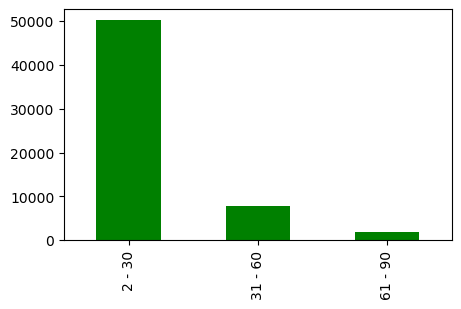

In [17]:
sms_eligible_appointments_df['Interval Group'].value_counts().plot(kind='bar', figsize =(5,3), color='green')

In [18]:
# calculate percentage for age group categorical column values
sms_eligible_youth_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Age Group', 'Youth')
sms_eligible_young_adult_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Age Group', 'Young Adult')
sms_eligible_adult_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Age Group', 'Adult')
sms_eligible_older_adult_percentage = column_percentage_calculator(sms_eligible_appointments_df, 'Age Group', 'Older Adult and Seniors')

print('Percentage of SMS-Eligible appointments for Youths {}%'.format(round(sms_eligible_youth_percentage, 2)))
print('Percentage of SMS-Eligible appointments for Young Adults {}%'.format(round(sms_eligible_young_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments for Adults {}%'.format(round(sms_eligible_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments for Older Adults and Seniors {}%'.format(round(sms_eligible_older_adult_percentage, 2)))

Percentage of SMS-Eligible appointments for Youths 24.77%
Percentage of SMS-Eligible appointments for Young Adults 24.07%
Percentage of SMS-Eligible appointments for Adults 26.11%
Percentage of SMS-Eligible appointments for Older Adults and Seniors 25.05%


<AxesSubplot:>

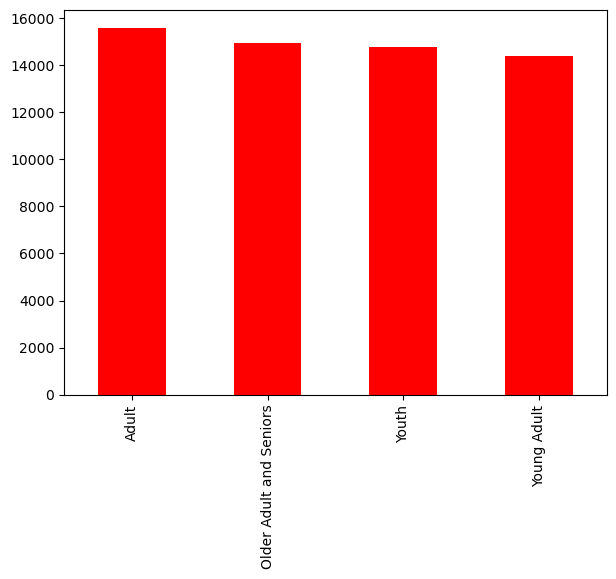

In [19]:
# create basic viz for age brackets/buckets
sms_eligible_appointments_df['Age Group'].value_counts().plot(kind='bar', figsize=(7,5), color='red')

__As each 'condition' is it's own column and the values are only binary (0 for no, 1 for yes), the percentages for these variables WRT total of all SMS-Eligible rows was obtained from the .describe() command and its output above. These values and respective labels will be used to visualize these variables on a bar graph.__

[Text(0, 0, 'Handicap'),
 Text(1, 0, 'Alcoholism'),
 Text(2, 0, 'Diabetes'),
 Text(3, 0, 'Scholarship Program'),
 Text(4, 0, 'Hypertension')]

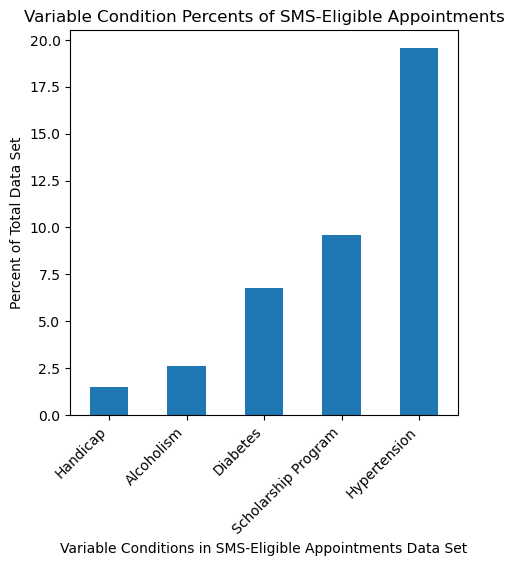

In [20]:
# create pandas series to graph and list of respective labels
condition_percents = pd.Series([1.48, 2.59, 6.75, 9.6, 19.54])
labels = ['Handicap', 'Alcoholism', 'Diabetes', 'Scholarship Program', 'Hypertension']


# plot graph of variable condition percentages
plt.figure(figsize=(5,5))
ax = condition_percents.plot(kind='bar')
ax.set_title('Variable Condition Percents of SMS-Eligible Appointments')
ax.set_xlabel('Variable Conditions in SMS-Eligible Appointments Data Set')
ax.set_ylabel('Percent of Total Data Set')
ax.set_xticklabels(labels, rotation=45, ha='right')

# ALL_SMS_ELIGIBLE_ROWS GENERAL STATS

__We can see from the descriptive statistics in the cell above that for all sms-eligible rows:__
- __29.67% of SMS-Eligible Rows NO SHOW
- __70.33% of SMS-Eligible Rows PRESENTED
- __The average age is 37.5.__
- __The median age is 37.0__
- __The average time between the ScheduledDay and AppointmentDay is 17 days.__
- __59.12% of SMS-Eligible appointments received a SMS reminder.__
- __40.87% of SMS-Eligible appointments DID NOT receive a SMS reminder.__
- __Approximately 9.6% of SMS-Eligible appointments are for patients enrolled in the 'scholarship' program (explained earlier in analysis).__
- __Approximately 19.54% of SMS-Eligible appointments are for patients suffering from hipertension (hypertension).__
- __Approximately 6.75% of SMS-Eligible appointments are for patients suffering from diabetes.__
- __Approximately 2.59% of SMS-Eligible appointments are for patients suffering from alcoholism.__
- __Approximately 1.48% of SMS-Eligible appointments are for patients identifying as handicapped.__
- __Approximately 33.13% of all SMS-reminder eligible rows were for appointments for male patients.__
- __Approximately 66.87% of all SMS-reminder elibible rows were for appointments for female patients.__
- __Approximately 24.77% of SMS-Eligible appointments for Youths.__
- __Approximately 24.07% of SMS-Eligible appointments for Young Adults.__ 
- __Approximately 26.11% of SMS-Eligible appointments for Adults.__
- __Approximately 25.05% of SMS-Eligible appointments for Older Adults and Seniors.__ 
- __Approximately 84.05% of SMS-Eligible appointments were scheduled between 2 and 30 days out.__
- __Approximately 12.95% of SMS-Eligible appointments scheduled between 31 and 60 days out.__
- __Approximately 3.0% of SMS-Eligible appointments scheduled between 61 and 90 days out.__


# From here we need to create 2 new csvs from our cleaned and wrangled data set for ALL SMS ELIGIBLE ROWS. 

# One csv (1 of 2) will be filtered on the condition whether the appointment for which the patient WAS ELIGIBLE TO RECEIVE AN SMS REMINDER, BUT DID NOT RECEIVE AN SMS REMINDER.

# The second csv (2 of 2) will be filtered on the condition whether the appointment for which the patient WAS ELIGIBLE TO RECEIVE AN SMS REMINDER, AND DID, IN FACT, RECEIVE A SMS REMINDER.

In [21]:
sms_eligible_not_receive_df = sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.SMS_received == 0)]
sms_eligible_did_receive_df = sms_eligible_appointments_df.loc[(sms_eligible_appointments_df.SMS_received == 1)]

In [22]:
sms_eligible_not_receive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24427 entries, 18 to 59744
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          24427 non-null  object
 1   Age             24427 non-null  int64 
 2   Scholarship     24427 non-null  int64 
 3   Hipertension    24427 non-null  int64 
 4   Diabetes        24427 non-null  int64 
 5   Alcoholism      24427 non-null  int64 
 6   Handicap        24427 non-null  int64 
 7   SMS_received    24427 non-null  int64 
 8   No-show         24427 non-null  int64 
 9   Days_Between    24427 non-null  int64 
 10  Day_Num         24427 non-null  int64 
 11  Age Group       24427 non-null  object
 12  Interval Group  24427 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.6+ MB


In [23]:
sms_eligible_did_receive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35327 entries, 0 to 59753
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          35327 non-null  object
 1   Age             35327 non-null  int64 
 2   Scholarship     35327 non-null  int64 
 3   Hipertension    35327 non-null  int64 
 4   Diabetes        35327 non-null  int64 
 5   Alcoholism      35327 non-null  int64 
 6   Handicap        35327 non-null  int64 
 7   SMS_received    35327 non-null  int64 
 8   No-show         35327 non-null  int64 
 9   Days_Between    35327 non-null  int64 
 10  Day_Num         35327 non-null  int64 
 11  Age Group       35327 non-null  object
 12  Interval Group  35327 non-null  object
dtypes: int64(10), object(3)
memory usage: 3.8+ MB


In [24]:
# # save csv file of those Eligible but who DID RECEIVE REMINDER for further separate analysis
# sms_eligible_did_receive_df.to_csv(os.path.join('SMS_Eligible_Received_SMS', 'sms_eligible_did_receive.csv'), index=False)

In [25]:
# # save csv file of those Eligible but who DID NOT RECEIVE REMINDER for further separate analysis
# sms_eligible_not_receive_df.to_csv(os.path.join('SMS_Eligible_Did_Not_Receive_SMS', 'sms_eligible_not_receive.csv'), index=False)

In [26]:
os.listdir()

['.ipynb_checkpoints',
 'SMS_Eligible_Did_Not_Receive_SMS',
 'SMS_Eligible_Received_SMS',
 'SMS_Eligible_Total_All_Rows_Analysis.ipynb',
 'sms_reminder_eligible_clean.csv']

# This concludes the additional cleaning, data engineering, and EDA that was necessary on the SMS_Eligible dataset that contained all rows eligible to receive a reminder.

In [27]:
1==1

True